In [2]:

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np

Data

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


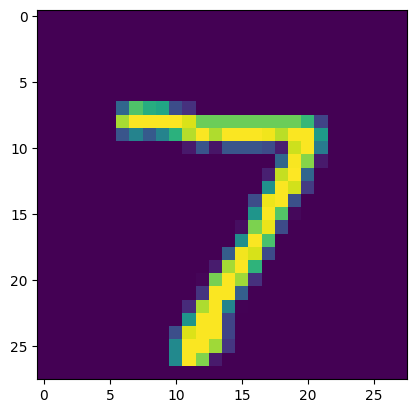

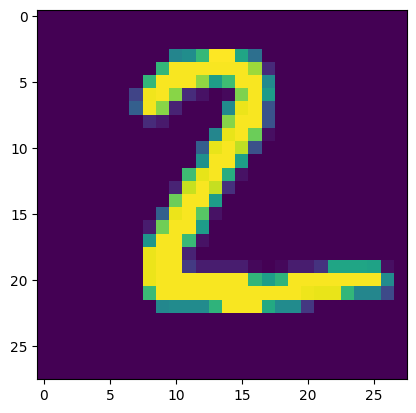

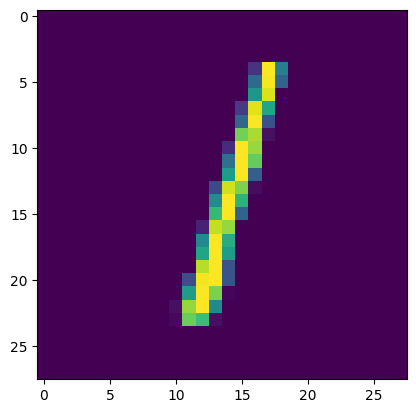

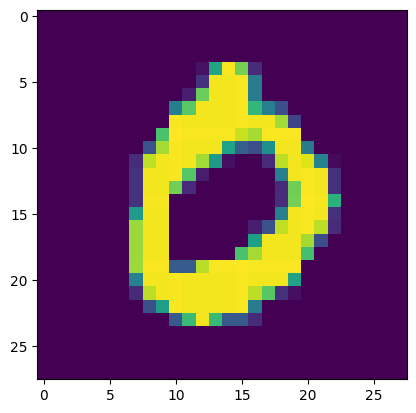

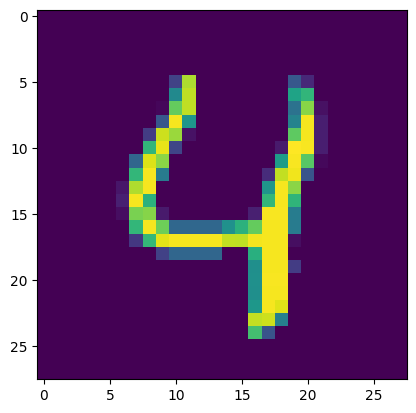

In [7]:
for i in range(5):  
    plt.figure()  
    plt.imshow(X_test[i])
plt.show()


In [ ]:
print(X_test[0])
print(X_test[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

: 

In [5]:
scaler = StandardScaler()
X_train = X_train/255
X_test = X_test/255
X_train_flattned = X_train.reshape(X_train.shape[0],784)
X_test_flattned = X_test.reshape(len(X_test),784)
print(X_train_flattned.shape)



print(X_train_flattned[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattned, y_train, epochs=5)

Epoch 1/5
1621/1875 [========================>.....] - ETA: 0s - loss: 0.4858 - accuracy: 0.8731

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_flattned,y_test)
y_pred = model.predict(X_test_flattned)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred[1])
print(np.argmax(y_pred[1]),y_test[1])

[4.7862992e-01 1.0677366e-02 9.9917912e-01 3.9696327e-01 7.1100031e-10
 8.5662293e-01 7.8606242e-01 7.6914018e-13 1.4833868e-01 3.2193734e-09]
2 2


<Axes: >

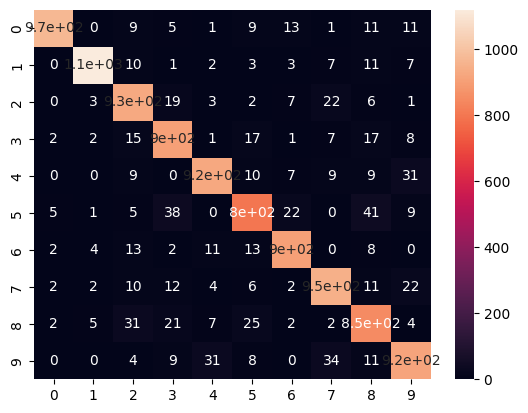

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_labels = [np.argmax(L) for L in y_pred]
sns.heatmap(confusion_matrix(y_pred_labels,y_test),annot=True)

With one hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattned, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test_flattned,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.9707


[0.09265533089637756, 0.9707000255584717]

Using Flatten layer so that we don't have to call .reshape on input dataset
<p>On conserve les données relatives au réseau de neurones dans tf_callbacks situé dans le dossier logs</p>
<p>Pour l'afficher, il faut tapper dans le terminal de vs code tensorboard --logdir dl_tf_keras/logs/</p>
<p>c.à.d tesorboard --logdir puis le chemis jusqu'au fichier log_dir à partir de où se trouve la .venv</p>

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)


model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2741 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9839


In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9711


[0.09084344655275345, 0.9710999727249146]